# 通过高中支持来理解KalmanFilter

[原文链接](https://blog.csdn.net/varyshare/article/details/95065650)

## 破解概念上的认知枷锁：卡尔曼滤波做的事

卡尔曼滤波做的事就是：举个例子，已知上个时刻飞机的位置，知道现在这个时刻收到的雷达测量的飞机的位置。用前面两个数据来估计此时飞机的位置。精简的说就是知道上个时刻状态，又知道测量数据，融合这两个数据来求当前状态。

你一定会问现在知道当前时刻的测量数据那么我认为当前状态就是测量数据不就好了么？换句话说：“你一定会觉得雷达测量到的飞机位置不就是当前飞机的位置嘛？为何要用卡尔曼滤波来估计飞机当前的位置？”。

答：现在这个时刻收到的雷达信号测量的飞机的位置还真不一定是飞机当前的真实位置。首先雷达信号测量有误差。其次你想想我现在收到雷达信号，那是之前发射过去然后返回的信号。这个过程是不是要时间？这段时间飞机说不定以超2倍音速飞行，说不定直接坠机，这些都有可能。**也就是说即使收到测量数据但是还是不确飞机位置在哪**。于是我得需要根据前一个时刻的位置估计出当前时刻的飞机位置 结合 测量数据 综合考虑来 估计当前飞机位置。这就是卡尔曼滤波的作用。

那么你一定会问根据前一个时刻估计的飞机位置怎么就可以估计现在这个时刻的飞机位置了？
答：卡尔曼认为所有的状态变化（位置变化）都是线性的。什么叫做线性？上个时刻位置是0.3，速度是0.2。那么我估计下个时刻的位置就是0.5。这就叫做线性。

接下来你一定会问那并不是所有的状态变化都是线性的怎么办？你像风速变化它就不是线性的。
答：恭喜你发明了新的算法。事实上别人已经为这个算法命名了叫做扩展卡尔曼滤波。现在我们要学习的是卡尔曼滤波。你只需要记住**曼滤波就是认为所有变化都是线性的**


那么现在我知道了怎么用上个时刻飞机的位置估计当前时刻的飞机位置，也知道了还得借助当前时刻收到的测量数据来综合考虑来估计当前飞机的位置。那么怎么综合考虑呢？这就涉及到一个比例。**这两个数据占比多少**？这就是卡尔曼滤波的核心精髓。卡尔曼滤波算法要动态的调这个比例。（有种中庸之道的调调，既不只信测量数据，也不只信上个时刻的位置所估算的当前时刻位置。）

## 滤波算法的思路发展？

如果不理解滤波思路那么今天学会了一个卡尔曼滤波明天还有一个通尔曼滤波要你学。如果学会这些滤波算法的思路，把他们联系在一起然后记忆那就简单多了。**算法本质上就是利用多个数据来融合估计真实状态**。下面举两个从浅到深的例子。

### 如何结合“飞机的速度和雷达测量的飞机的位置 ”来估计飞机在$t_2$时刻的位置？

下面有个一个飞机只会水平飞行。我们已知上个时刻飞机的位置$x_1$和速度$v_1$.而且雷达可以测量到$t_2$此时飞机的位置$x_2^*$。那么我们估计飞机的位置那就有两种方法：“一是认为飞机是匀速$(v_2 = v_1)$直线运动得到现在飞机位置为$x_1 + v_2(t_2 - t_1)$,另一种是认为飞机位置就是测量值$x_2^{*''}$。如果按第一种那么万一飞机不是匀速走呢？如果按第二种万一雷达很不准呢？我们得采取一种折中的方法。我们认为飞机在时刻$t_2$的位置为$x_2^{real} = (x_1 + v_2(t_2 - t_1)) + \alpha[x_2^* - (x_1 + v_2(t_2 - t_1))]$。这个$\alpha$需要我们自己设置。如果我们相信雷达不准那就$\alpha$赋值很低比如为0.1.如果我们相信雷达很准那么就设置$\alpha$为很接近1的值比如0.9。你会发现$\alpha$越接近0,那么所估计的位置越是接近认为飞机匀速走的那个思路。越接近1那么所估计的位置越接近雷达测量值（等于1就是认为飞机在时刻$t_2$的位置就是雷达测量值）。

![](https://img-blog.csdnimg.cn/20190708205030217.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3ZhcnlzaGFyZQ==,size_16,color_FFFFFF,t_70)

但是飞机的速度怎么估计啊？因为飞机不一定是匀速走。我们得根据现在我想估计飞机的速度。速度估计的方式有两种：

1. 假设飞机是匀速运动。也就是说$t_1$到$t_2$这段时间内飞机速度等于在$t_1$时刻估计出的飞机速度$v_1$。即$v_2 = v_1$
2. 由于雷达也收到了一个测量数据，它测量到雷达距离飞机位置是$x_2^*$也就是说在雷达看来从$t_1$到$t_2$这段时间内飞机走过了$x_2^* - x_1$这么远的距离。所以根据雷达的判断，我们可以估计出飞机的一个速度$v_2^* = \frac{x_2^{measure}  -  x_1^{real}}{t_2 - t_1}$。

这两种速度很可能不同，这有两个原因：“一是飞机并不是匀速运动，二是雷达根本就测量的距离不准”。到底是哪个对呢？真实速度需要综合考虑这两个数值，根据上一个例子总结的滤波器模式**第N次算出的估计值=上次的估计值+ 因子a ×（测量值-上次估计值）**。我们知道真实的速度肯定可以这么表达$v_2^{real} = v_1 + \beta\times(v_2^* - v_1^{real})$至于这个$\beta$到底取多少这是我们自己赋值。比如我们觉得测量的值是更准确的，那$\beta$可以设置大一点比如0.9。如果我们觉得雷达不准那就$\beta$设置小一点比如0.1。所以我们得到速度的估计公式：$$v_2^{real} = v_1^{real} + \beta\times(v_2^* - v_1^{real}),其中 v_2^* = \frac{x_2^{measure} - x_1^{real}}{t_2 - t_1}$$然后我们又可以根据这个求得的速度来更精确的估计飞机的位置$$x_2^{real} = (x_1^{real} + v_2^{real}(t_2 - t_1)) + \alpha[x_2^* - (x_1^{real} + v_2^{real}(t_2 - t_1))]$$

### 如何结合“飞机的速度，加速度，雷达测量的飞机的位置” 来估计飞机的位置？

在前面我们一直做的假设是飞机是匀速走的。但是飞机很可能会发生加速或者减速。这就不得不考虑加速度的问题了。

在高中我们学过位移与速度和加速度之间的关系是：$x_2 = x_1 + v_1(t_2 - t_1) + \frac{1}{2}\alpha_2(t_2 - t_1)^2$。其中$\alpha_2$是从$t_1$$t_2$这段时间的加速度。

**所以飞机的位置可以融合速度、加速度这样来估计**：$$x_2^{real} = (x_1^{real} + v_2^{real}(t_2 - t_1) + \frac{1}{2}\alpha_2(t_2 - t_1)^2) + \alpha[x_2^* - (x_1^{real} + v_2^{real}(t_2 - t_1) + \frac{1}{2}\alpha_2(t_2 - t_1)^2)]$$

可以看到和前面那个例子的位置估计公式：$x_2^{real} = (x_1^{real} + v_2^{real}(t_2 - t_1)) + \alpha[x_2^* - (x_1^{real} + v_2^{real}(t_2 - t_1))]$相比，只是将原来的根据速度估计位移变成了根据速度和加速度来估计位移。

**在前面提到了我们的速度可以根据测量数进行动态更新**：

$$v_2^{real} = v_1^{real} + \beta\times(v_2^* - v_1^{real}),其中 v_2^* = \frac{x_2^{measure} - x_1^{real}}{t_2 - t_1}$$

**当然我们的加速度也是可以根据测量数据进行动态更新的**

$$a_2^{real} = a_1^{real} + \gamma\times(a_2^* - a_1^{real}),其中 a_2^* = \frac{v_2^{measure} - v_1^{real}}{t_2 - t_1}$$,这个是根据加速度的定义所得来的，加速度=速度变化量除以时间间隔。

可以看到滤波思路是一环扣一环，它要平衡每个环节中的 根据之前状态所估计出当前状态值 和 测量值之间的在最终结果中的占比。

而那些滤波算法要做的事就是设计合理的占比到底取多少比较合适。而且是需要根据不同情况动态的设置占比。前面提到的例子中占比变量有三个$\alpha,\beta,\gamma$,你学习滤波算法时只需要关注这几个占比值是怎么计算的就可以了。

像卡尔曼滤波，拓展的卡尔曼滤波，Particle Filter，贝叶斯滤波等等都是前面提到滤波思路这种形式。

## 卡尔曼滤波怎么进行滤波的？

我们先把前面总结的滤波算法规律复制过来看看：
1. 估计当前时刻位置：$$x_2^{real} = (x_1^{real} + v_2^{real}(t_2 - t_1) + \frac{1}{2}\alpha_2(t_2 - t_1)^2) + \alpha[x_2^* - (x_1^{real} + v_2^{real}(t_2 - t_1) + \frac{1}{2}\alpha_2(t_2 - t_1)^2)]$$
2. 估计当前时刻速度：$$v_2^{real} = v_1^{real} + \beta\times(v_2^* - v_1^{real}),其中 v_2^* = \frac{x_2^{measure} - x_1^{real}}{t_2 - t_1}$$
3. 估计当前时刻加速度：$$a_2^{real} = a_1^{real} + \gamma\times(a_2^* - a_1^{real}),其中 a_2^* = \frac{v_2^{measure} - v_1^{real}}{t_2 - t_1}$$

前面我们提到了那些种类繁多的滤波算法，无非就是提出了各种确定$\alpha,\beta,\gamma$具体取值的计算方法而已。

我们看看卡尔曼滤波是怎么确定这三个值的。

- $\alpha$这个是用来调节**根据上个位置估计出的当前位置值**与**测量值**在最终结果中的占比用的。这个在卡尔曼滤波中叫做**卡尔曼增益**。当然既然叫卡尔曼增益了肯定变量名就不叫做$\alpha$了而是叫做$K_n$。
- $\beta$是用来调节**根据上个时刻速度估计出的当前时刻速度值**与**根据测量值算出的速度**在最终结果中的这两个数占比用的。在卡尔曼滤波中它认为物体就是匀速运动的。所以当前时刻速度和上个时刻速度一样，即$\beta = 0$。
- 上面那句话提到了物体是匀速运动的所以没有加速度，即$\gamma$

于是卡尔曼滤波可以这么写：

1. 估计当前时刻位置：$$x_2^{real} = x_1^{real} + v_2^{real}(t_2 - t_1) + \alpha(x_2^* - (x_1^{real} + v_2^{real}(t_2 - t_1)))$$
2. 估计当前时刻速度：$$x_2^{real} = x_1^{real}$$

那么$K_n$	怎么计算呢？ $$K_n = \frac{根据上个状态算出当前状态这种方法的方差p_{n-1}}{根据上个状态算出当前状态这种方法的方差p_{n-1} + 测量仪器的方差}$$

橘黄色虚线是根据市上个状态计算出当前状态的估计值，绿色虚线是测量值，紫色虚线是最终结果。而$K_n$这个数字就是调节紫色虚线到底是靠近另外两条线中的哪个。

现在我们得到了新的位置估计值，那么根据这个来估计下一个位置它的方差$p_{n-1}$是多少呢？由于根据上个状态算出当前状态这个数字在最终结果的占比只占了$1 - K_n$这么多。所以方差$p_n=(1−k_n)p_{n−1}$

由上面这段话可以看出，卡尔曼滤波最关键的是需要求出**两种方差**。**一是纯粹依赖估计的这种方法的方差**。**二是测量仪器的方差**。只要知道了这两个值那就可以知道估计值和测量值在最终结果中的占比。算方差的方法在不同应用场景是不同的需要以实际情况而定。

注意：根据上个状态估计当前时刻的位置方法不是只有根据速度和加速度来估计这一种方法。还有其他很多种。比如我可以根据飞机发动机此时的推动力和这段时间内燃烧了的汽油来估计飞机飞行了的距离（能量守恒定律，推动力×距离=做功）。

![](https://img-blog.csdnimg.cn/2019070916470045.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3ZhcnlzaGFyZQ==,size_16,color_FFFFFF,t_70)


# KalmanFilter的Python代码实现

接下来我们使用Python实现卡尔曼滤波

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
NUM_POINTS = 500
NUM_TIME = 40

time = np.linspace(0,NUM_TIME,NUM_POINTS)  # 0-40均匀去500个点
realpos = np.sin(time/5)  # 真实位置值

In [3]:
def takeMeasurement(realpos):
    '''
    function:
    ---------
    模拟生成一个测量值。生成方法：给真实位置值加高斯噪声。
    为何加高斯噪声？因为噪声一般是服从高斯分布的
    parameter:
    ----------
    @realpos: float, 某个时刻的真实位置.
    
    returns:
    --------
    @z: float, 某个时刻的位置测量值. 
    '''
    measurementNoise = 0.15
    z = np.random.normal(realpos,measurementNoise)
    
    return z

In [5]:
def takeOdometry(realpos_prev, realpos_curr):
    '''
    function:
    ---------
    生成一个上个时刻到当前时刻走过的距离估计值（即速度，单位时间内走过的距离不就是速度么？）。
    （在这里为了简化问题我们就不加入速度，就直接随机生成一个速度）
       
    parameters:
    -----------
    @realpos_prev: float, 前一个时刻位置真实值.
    @realpos_curr: float, 当前时刻位置真实值.
    
    returns:
    --------
    @u: float, 上个时刻到当前时刻走过的距离估计值
    '''
    processNoise = 0.05
    if realpos_prev == realpos_curr:
        u = 0
    else:
        u = np.random.normal(realpos_curr - realpos_prev,processNoise)
    return u

In [6]:
processNoise = 0.1;# 估计误差，初始化
measurementNoise = 0.1;# 测量误差，初始化
estimated_position = [] # list of best-guess estimates
x = realpos[0] # 真实位置x，初始化
p = processNoise # 方差，根据上个时刻位置估计出的当前位置的方差

unfilterOdometryReading = realpos[0] # raw odometer readings
unfilterOdometry = [] # list of odometry estimates 
unfilterMeasurements = [] # list of measurements
measurement_time = []

In [7]:
for i in range(len(time)):
    
    # step 1: 生成上个时刻到当前时刻这段时间走过的估计距离
    if i == 0:
        u = takeOdometry(realpos[i],realpos[i])
    else:
        u = takeOdometry(realpos[i-1],realpos[i])
    x += u
    
    # 记录纯靠估计值所估计出的位置，用作后面的对比
    unfilterOdometryReading += u
    unfilterOdometry.append(unfilterOdometryReading)
    
    p += processNoise  # std + Noise
    
    # 每10步进行一次测量
    
    if i % 10 == 0:
        z = takeMeasurement(realpos[i]) #模拟一次测量
        
        # 存档测量值，用作后面的对比
        
        measurement_time.append(time[i])
        unfilterMeasurements.append(z)
        
        # 根据测量值修正位置估计值  ---> update Data
        y = z - x  # z --> measurement & x --> estimation
        k = p / (p + measurementNoise)
        x = x + k * y
        p = (1 - k) * p
    
    # 记录修正后的位置估计值
    estimated_position.append(x)

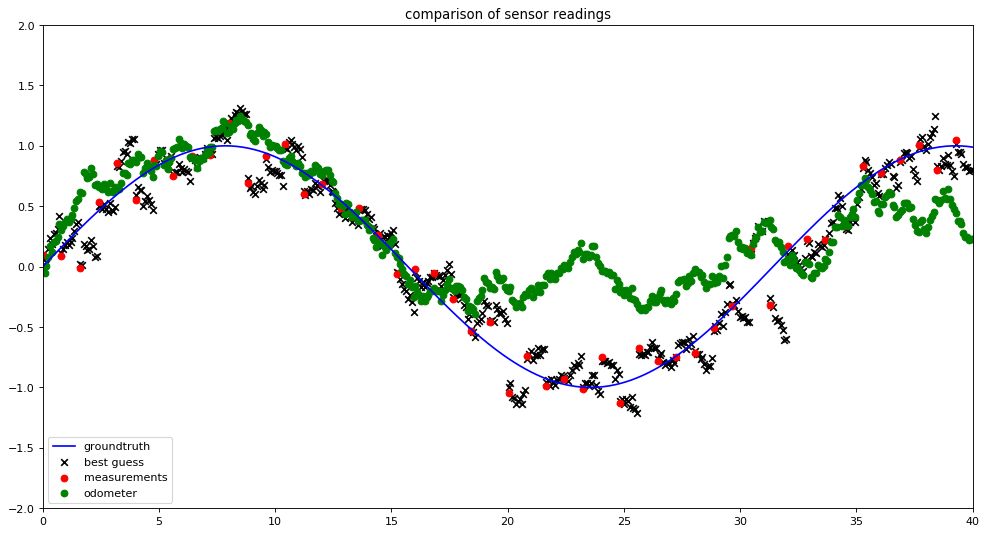

In [24]:
# 对比三种情况下的位置，和真实位置之间的差异
plt.figure(figsize=(15,8),dpi=80)
plt.plot(time, realpos, color = 'b',label='groundtruth') # groundtruth
plt.scatter(time, estimated_position, color = 'k', marker = 'x',label='best guess') # best guess
plt.scatter(measurement_time, unfilterMeasurements, color = 'r',label='measurements') # measurements
plt.scatter(time, unfilterOdometry, color = 'g',label='odometer') # odometer
plt.title('comparison of sensor readings')
plt.ylim(-2, 2)
plt.xlim(0, 40)
plt.legend(loc='lower left')
plt.show()

# 使用Python对SPY进行KalmanFilter

### Purpose : Get Mean & Std

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pykalman import KalmanFilter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
df = pd.read_csv('SPY.csv')
df['mean'] = df.close.rolling(10).mean()
df['std'] = df.close.rolling(10).std()
df = df[['time','close','mean','std']]
df.dropna(how='any',inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()  # SPY --> S&P 500 ETF

,time,close,mean,std
0,2005-01-14,88.3659,88.61257,0.540013
1,2005-01-18,89.2852,88.55054,0.389702
2,2005-01-19,88.3510,88.51243,0.388607
3,2005-01-20,87.8129,88.47431,0.438763
4,2005-01-21,87.2748,88.33754,0.573109


**We are gonna to get the std and mean(10 days rolling mean)  of SPY close price by using Kalman Filter**

1. 估计当前时刻位置：$$x_2^{real} = x_1^{real} + v_2^{real}(t_2 - t_1) + \alpha(x_2^* - (x_1^{real} + v_2^{real}(t_2 - t_1)))$$
2. 估计当前时刻速度：$$x_2^{real} = x_1^{real}$$

接下来，我们使用卡尔曼滤波的估计值和应用移动平均法得到的估计值来同时估计我们真实数据的滚动值，我们希望估计出的结果能够很好的拟合当前值，因此当我们添加一个新的变量值时，估计值不应该改变太多。这里我们假设原始数据的改变是一个随机过程，并且其方差项很小。因此对下一期值的最好估计是假设其等于当前值。由于缺乏更好的假设，这里我们假设使用卡尔曼滤波法时其滚动观测值的方差为1。初始的预测值设为0，但是这会随着卡尔曼滤波过程的进行而不断得到校正与更新。

In [77]:
# 构建一个卡尔曼滤波器
kf = KalmanFilter(transition_matrices = [1], # known as A.  state transition matrix between times t and t+1 for t in [0...n_timesteps-2]
                 observation_matrices = [1],  # known as C.  observation matrix for times
                 initial_state_mean= 0,  # known as mu_0. mean of initial state distribution
                 initial_state_covariance = 1,  #  known as Sigma_0.  covariance of initial state
                 observation_covariance =  0.0001, # known as R.  observation covariance matrix for times
                 transition_covariance= 0.0001) #  known as Q.  state transition covariance matrix for times

# 一些理解： 对于Q和R，我们直接取很小的值就可以了，但是不能为0，如果为0，
# 可能会令卡尔曼方程系统认为给定的 X(0|0) 是系统最优的，从而使算法不能收敛

In [78]:
state_means,_ = kf.filter(df.close)

In [79]:
state_means

array([[ 88.35706429],
       [ 88.97581112],
       [ 88.58530515],
       ...,
       [243.86531452],
       [244.85700288],
       [246.56456721]])

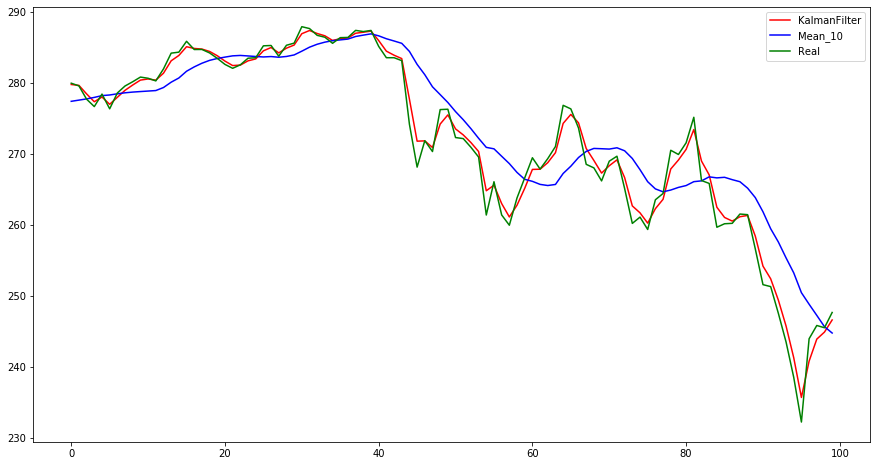

In [80]:
plt.figure(figsize=(15,8))
plt.plot(state_means[-100:],color='r',label='KalmanFilter')
plt.plot(df['mean'].to_list()[-100:],color='b',label='Mean_10')
plt.plot(df['close'].to_list()[-100:],color='g',label='Real')
plt.legend()